In [1]:
# import neccessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data visualization setting

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
# load the csv dataset using pd

df = pd.read_csv('datasets/bank_churn.csv')

In [4]:
# overview of data

print(df.head())
print(df.describe())
print(df.info())
print(df.shape)

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

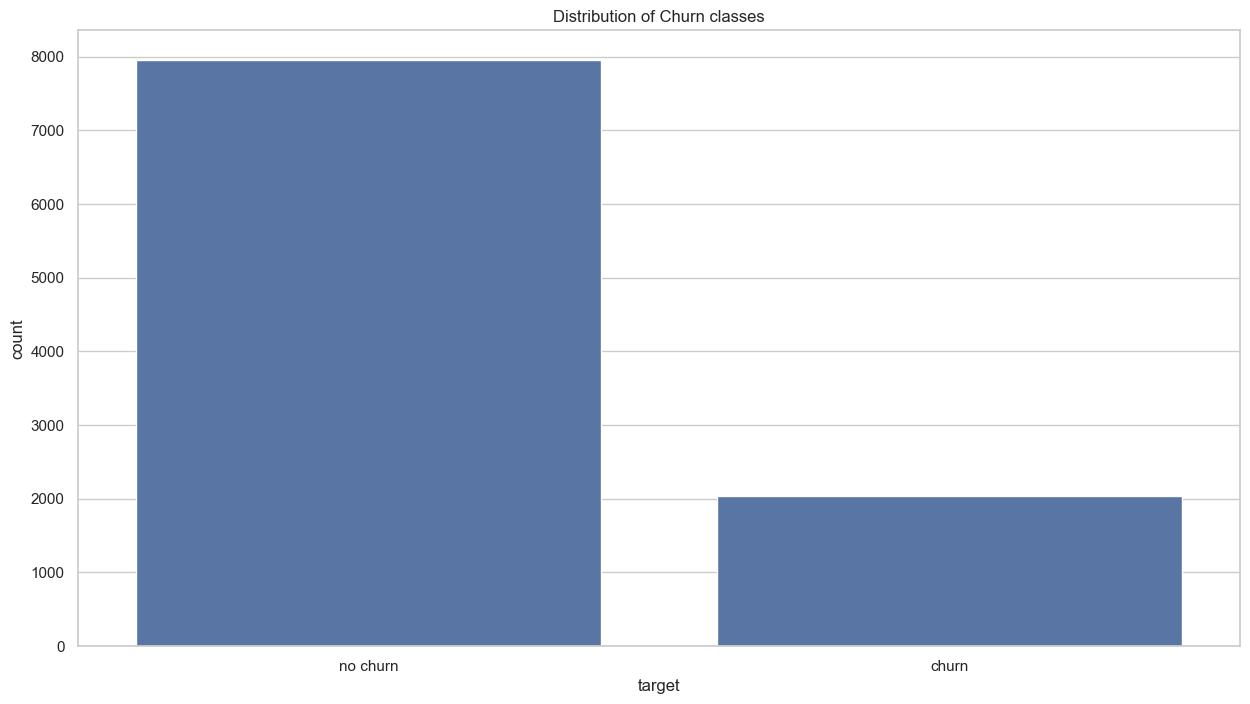

In [5]:
# countplot of churn classes

sns.countplot(x='churn', data=df)
plt.xlabel('target')
plt.xticks([0, 1], ['no churn', 'churn'])
plt.title("Distribution of Churn classes")
plt.show()

In [6]:
# seperate the feature and target variables

X = df.drop("churn", axis=1)
y = df["churn"]

In [7]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# encode categorical variables 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['country']),
                  ('ordinal', OrdinalEncoder(), ['gender'])
],
    remainder='passthrough'
)

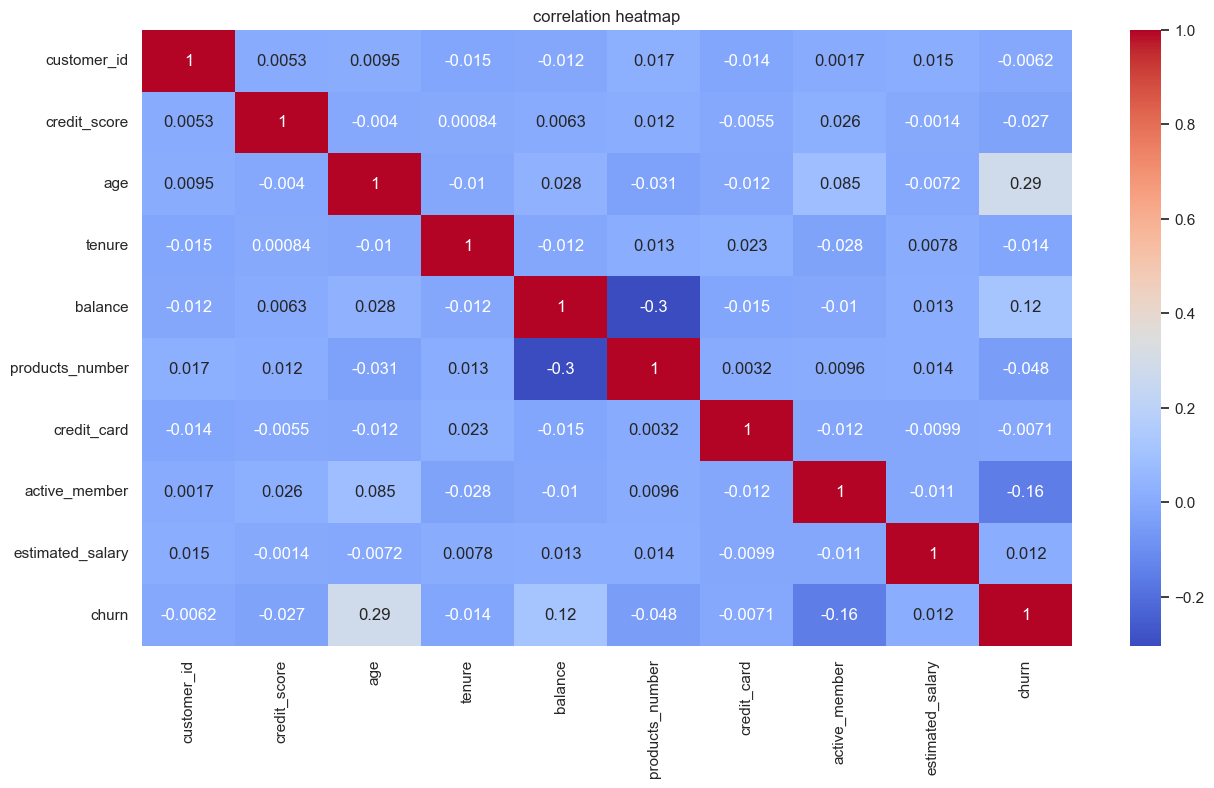

In [9]:
# correlation heatmap

encoded_array = ct.fit_transform(df.drop(columns=['churn']))
encoded_df = pd.DataFrame(encoded_array.toarray() if hasattr(encoded_array, "toarray") else encoded_array)
encoded_df['churn'] = df['churn'].values

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show(block=False)


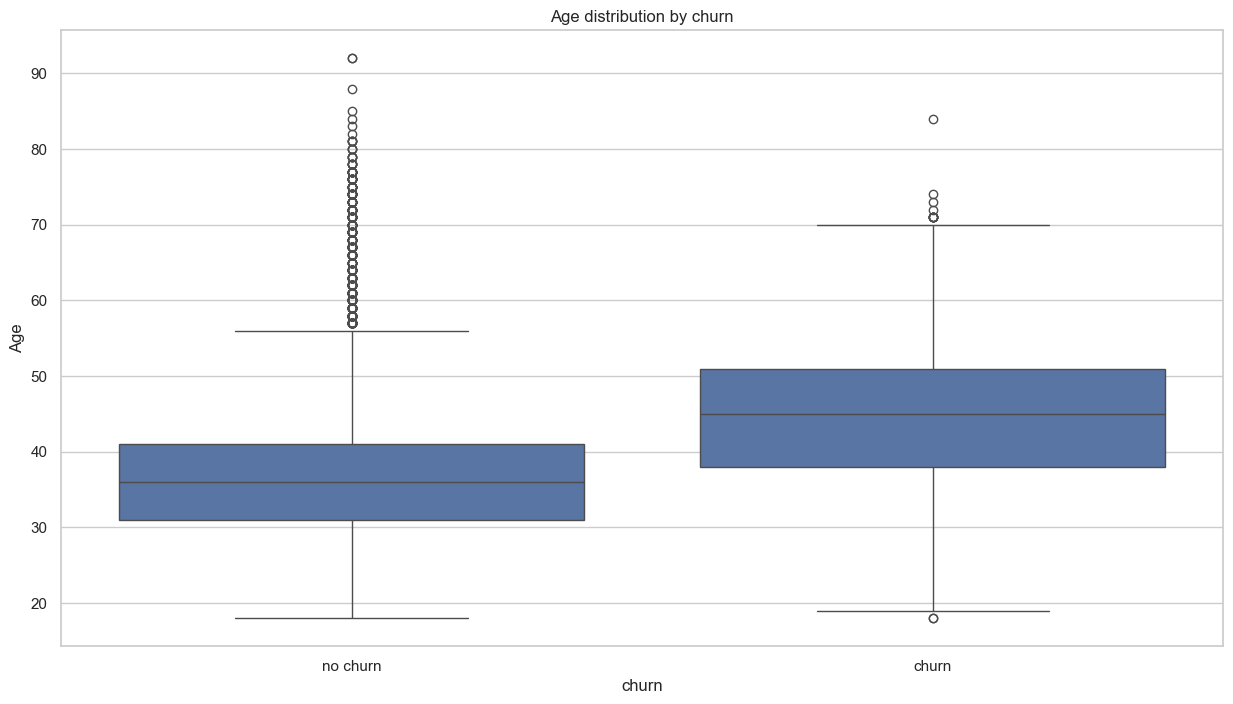

In [10]:
# boxplot showing age vs churn

sns.boxplot(x='churn', y='age', data=df)
plt.title('Age distribution by churn')
plt.xticks([0, 1], ['no churn', 'churn'])
plt.ylabel('Age')
plt.show()

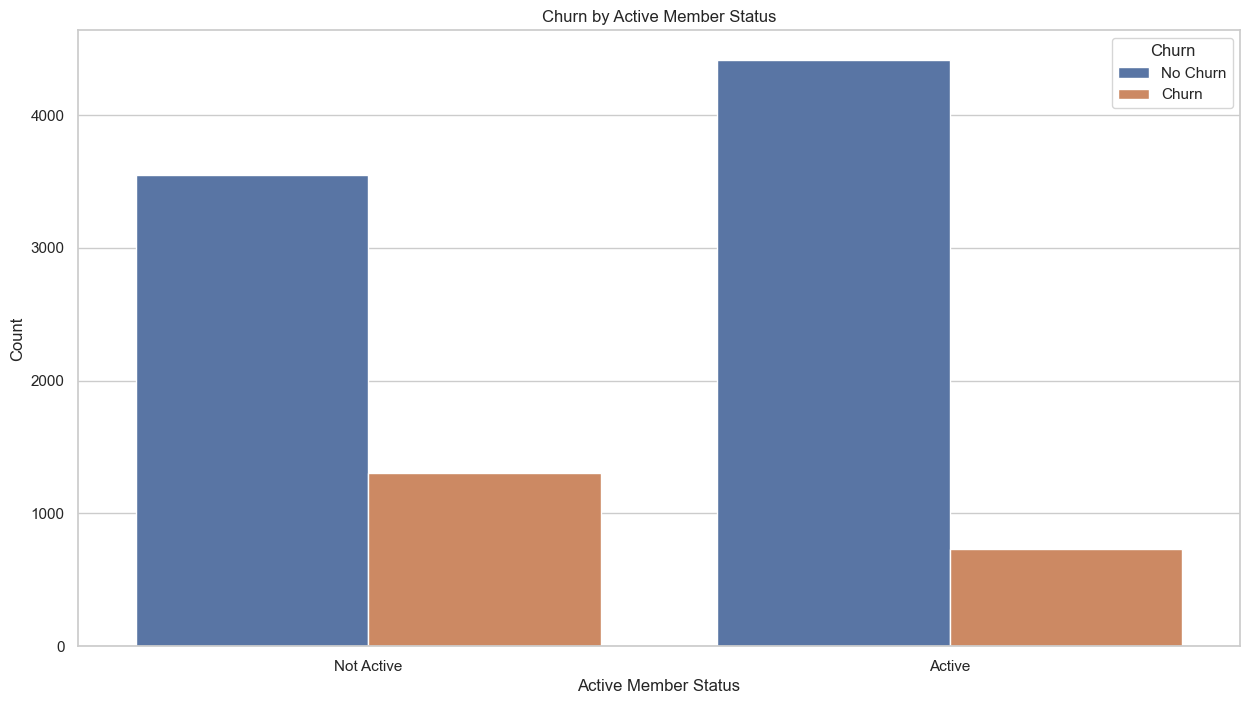

In [12]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.xticks([0, 1], ['Not Active', 'Active'])
plt.xlabel('Active Member Status')
plt.ylabel('Count')
plt.title('Churn by Active Member Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

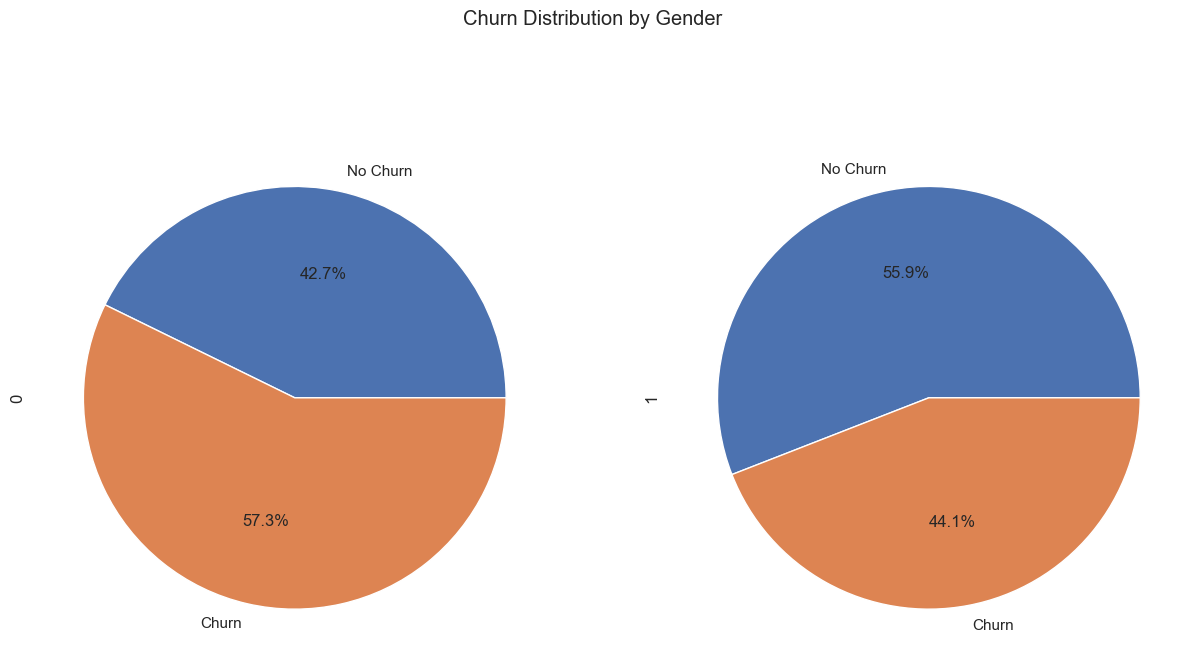

In [15]:
# pie chart showing how churn is distributed across genders

df.groupby('gender')['churn'].value_counts().unstack().plot(
    kind='pie', subplots=True, autopct='%1.1f%%',
    labels=['No Churn', 'Churn'], legend=False
)
plt.suptitle('Churn Distribution by Gender')
plt.show()

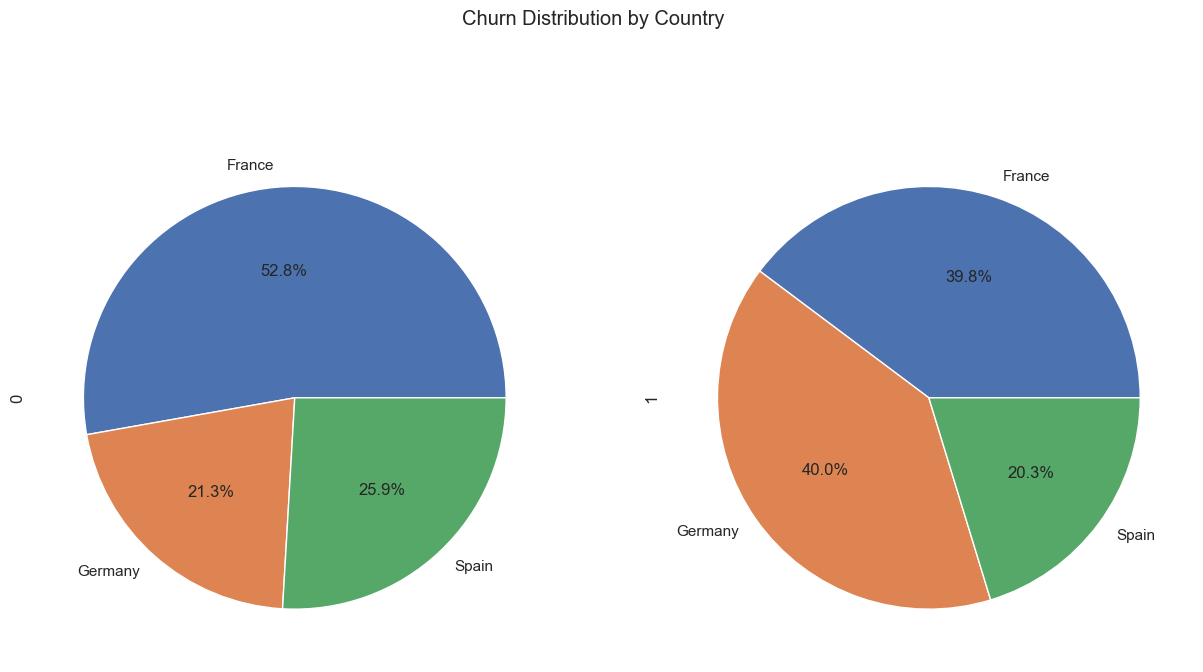

In [21]:
# pie chart showing how churn is distributed across countries

df.groupby('country')['churn'].value_counts().unstack().plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    legend=False
)

plt.suptitle('Churn Distribution by Country')
plt.show()

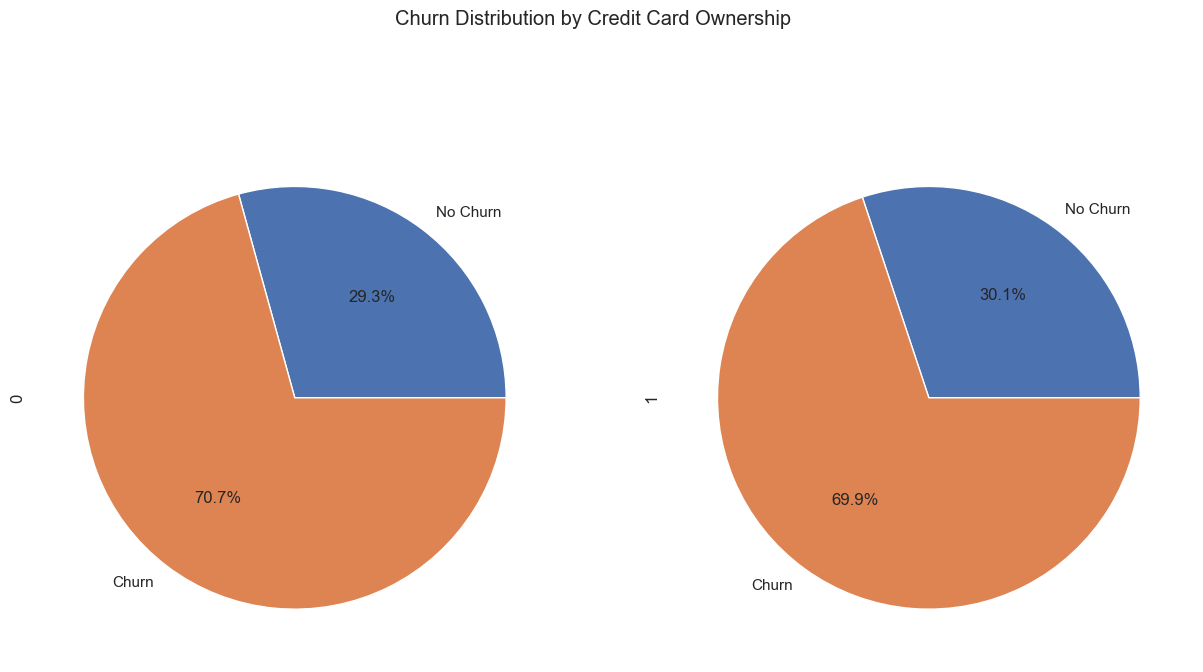

In [22]:
# pie chart showing how churn is distributed across credit card holders

df.groupby('credit_card')['churn'].value_counts().unstack().plot(
    kind='pie', 
    subplots=True, 
    autopct='%1.1f%%',
    labels=['No Churn', 'Churn'], 
    legend=False
)
plt.suptitle('Churn Distribution by Credit Card Ownership')
plt.show()

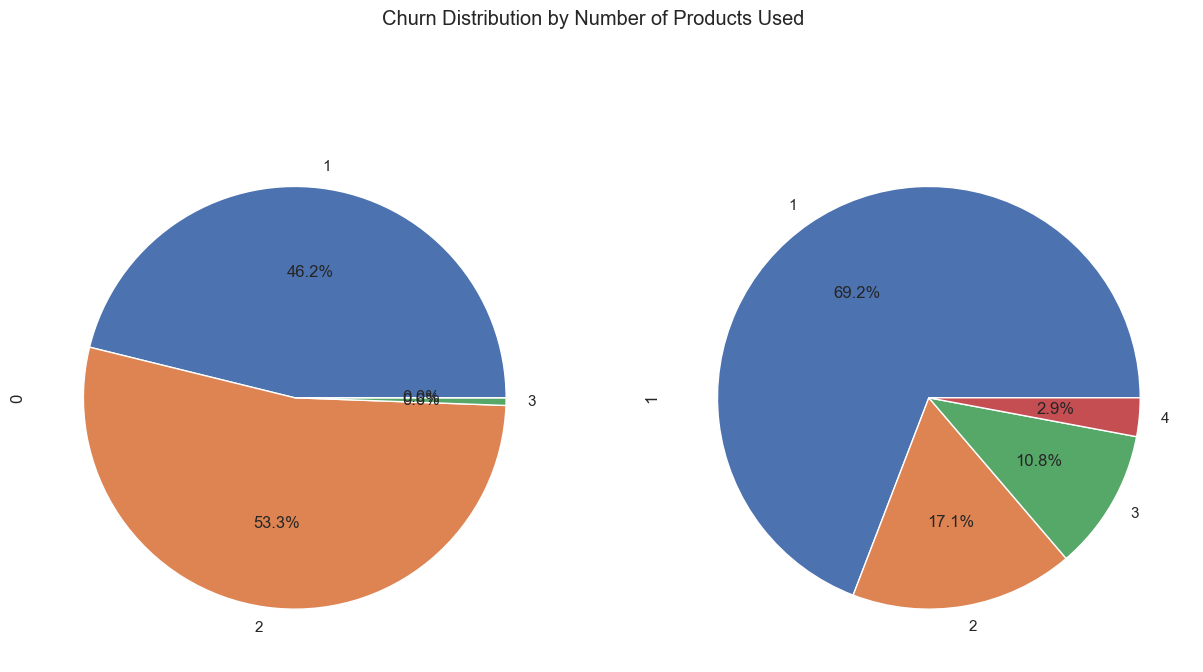

In [23]:
# pie chart showing how product usage impacts churn

df.groupby('products_number')['churn'].value_counts().unstack().plot(
    kind='pie', 
    subplots=True, 
    autopct='%1.1f%%', 
    legend=False
)
plt.suptitle('Churn Distribution by Number of Products Used')
plt.show()